In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.decomposition import PCA

In [2]:
"""
Класс логистической регрессии был модифицирован и теперь метод fit возвращает список со значениями
функции ошибки (binary cross-entropy) на каждой итерации обучения.

Вы можете сравнивать графики функции ошибки для модели, обученной на `сырых данных` (пункт 1.1), и для модели, 
обученной на трансформированных данных (данные из пункта 1.3), для анализа влияния трансформаций на динамику обучения модели 
(ускорение обучения, ошибка ниже на первой итерации и т.д.).
"""

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def binary_cross_entropy(pred, label):
    return -np.mean(label * np.log(pred + 1e-6) + (1. - label) * np.log(1 - pred + 1e-6))


class LogisticRegression:
    def __init__(self, dim=2):
        rng = np.random.default_rng(seed=0)
        self.w = rng.normal(size=(dim, 1)) / np.sqrt(dim)
        self.b = np.zeros((1,))
        
    def predict(self, x, probs=False):
        x = x.dot(self.w) + self.b
        p = sigmoid(x)
        if probs:
            return p
        return np.array(p > 0.5).astype('int32')
        
    def fit(self, x, y, iters=300, lr=0.1):
        y = y.reshape(-1, 1)
        loss = []
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * x.T.dot(preds - y) / y.shape[0]
            self.b -= lr * np.mean(preds - y, axis=0)
            loss.append(binary_cross_entropy(preds, y))
        return loss

In [3]:
def load_data(folder_path):
    x_train = pd.read_csv(os.path.join(folder_path, 'x_train.csv'))
    y_train = pd.read_csv(os.path.join(folder_path, 'y_train.csv'))
    x_test = pd.read_csv(os.path.join(folder_path, 'x_test.csv'))
    y_test = pd.read_csv(os.path.join(folder_path, 'y_test.csv'))
    return x_train, y_train, x_test, y_test

In [56]:
x_train, y_train, x_test, y_test = load_data('lr3_dataset/')

In [57]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

В данной лабораторной работе будет практиковаться обработка данных на примере датасета для задачи распознавания ботов в социальной сети Твиттер. Класс 0 означает человек, класс 1 означает бот. Обучите модель так, чтобы вероятность пропуска бота составляла менее 4% (данный порог может быть ослаблен в зависимости от общих результатов лабораторных). Значение метрики F1 должно быть не менее 0.95.

Требование: использовать лишь 10 признаков (это могут быть либо сгенерированные признаки, либо отобранные).

Допускается коллаборация (использование подходов к обработке данных, придуманных другими студентами) при условии ссылки на автора подхода в комментариях к коду (фамилия и инициалы).

## 1.1 Обучение baseline модели

Указание: в данном пункте не применяйте трансформации к данным за рамками указанных. Это необходимо для того, чтобы вы могли проводить сравнение в дальнейшем для лучшего понимания влияния вашего подхода к обработке данных на качество модели. Обучение baseline модели - стандартная практика, что даёт вам минимально рабочую модель и при этом позволяет отслеживать ваш прогресс.

In [58]:
unique_elements_train, counts_train = np.unique(y_train, return_counts=True)
unique_elements_test, counts_test = np.unique(y_test, return_counts=True)

In [59]:
print(f"Тренировочная выборка имеет {x_train.shape[0]} экземпляров и {x_train.shape[1]} признаков\nЧисло разных классов -->{counts_train}")

Тренировочная выборка имеет 1920 экземпляров и 19 признаков
Число разных классов -->[1428  492]


In [60]:
print(f"Тестовая выборка имеет {x_test.shape[0]} экземпляров и {x_test.shape[1]} признаков\nЧисло разных классов -->{counts_test}")

Тестовая выборка имеет 480 экземпляров и 19 признаков
Число разных классов -->[372 108]


<Axes: ylabel='Count'>

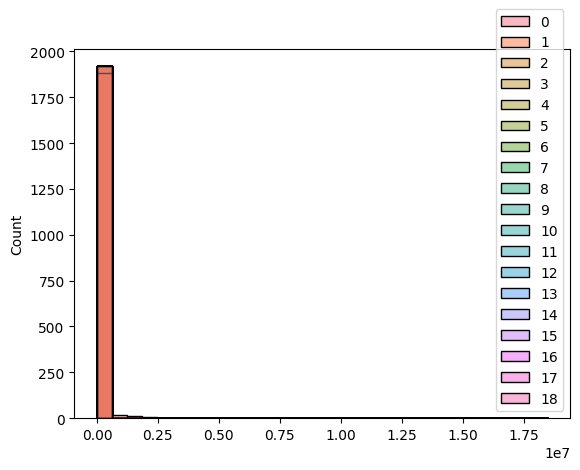

In [62]:
sns.histplot(x_train, bins=30, kde=False, color='blue', edgecolor='black')

Сначала избавимся от выбросов. Буду использовать метод "95 перцентиль", т.к. правило трех сигм удалило не все выбросы!

In [63]:
perc = np.percentile(x_train,95)
left_lim, right_lim = 0, perc

In [64]:
x_train = np.clip(left_lim,right_lim,x_train)

<Axes: ylabel='Count'>

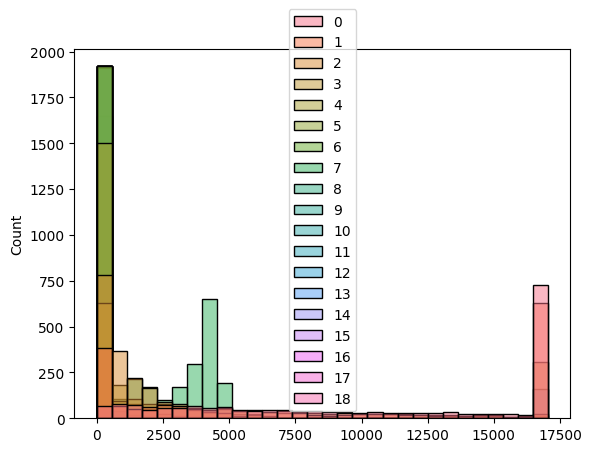

In [65]:
sns.histplot(x_train, bins=30, kde=False, color='blue', edgecolor='black')

PCA лучше всего работает с нормализованным набором функций. 

In [66]:
from sklearn.preprocessing import StandardScaler 

mean = np.mean(x_train,axis = 0)
std = np.std(x_train, axis = 0)
x_train_normed = (x_train - mean)/std
x_test = (x_test - mean)/std

In [67]:
# Снизьте размерность данных одним из способов:
# - вручную отобрав 10 признаков
# - используя PCA (from sklearn.decomposition import PCA)

# Напишите ваш код здесь.
n_components = 10
pca = PCA(n_components=n_components)
x_train_PCA = pca.fit_transform(x_train_mormed)
x_test = pca.transform(x_test) 

In [69]:
print(f"Тренировочная выборка имеет {x_train_PCA.shape[0]} экземпляров и {x_train_PCA.shape[1]} признаков\nЧисло разных классов -->{counts_train}")

Тренировочная выборка имеет 1920 экземпляров и 10 признаков
Число разных классов -->[1428  492]


In [ ]:
# Обучите baseline модель, с которой будете проводить сравнение.
# Используйте модель логистической регрессии выше.

# Напишите ваш код здесь.

In [ ]:
# Оцените качество обученной модели.

# Напишите ваш код здесь.

## 1.2 Анализ данных

In [ ]:
# Проанализируйте данные (наличие выбросов, распределения отдельных признаков и т.д.).

# Напишите ваш код здесь.

## 1.3 Обработка данных

In [ ]:
# Gредложите способы нормировки/улучшения качества данных. 
# Предложения должны быть описаны комментариями по пунктам.
# Реализуйте идеи по нормироке/улучшению качества данных.

# Напишите ваш код здесь.

## 1.4 Обучение итоговой модели

In [ ]:
# Обучите модель на трансформированных данных.

# Напишите ваш код здесь.

In [ ]:
# Оцените качество обученной модели.

# Напишите ваш код здесь.

## 2. Доп. задание (опционально)

В случае невозможности балансировки классов на уровне данных (как в ЛР1) используется балансировка на алгоритмическом уровне: 
взвешиваются значения функции ошибки для разных классов (большие веса используются для редких классов, малые веса для доминирующих классов), чтобы модель во время обучения 'фокусировалась' именно на редких классах. В данной лабораторной работе балансировка на уровне данных возможна, однако рассмотрение такого подхода даст вам еще один полезный практический инструмент.

Модифицируйте класс логистической регрессии так, чтобы во время обучения значения функции ошибки взвешивались для разных классов. 
Изменения будут представлять собой взвешивание индивидуальных градиентов (строки кода 28 и 29) для отдельных экземпляров данных.

Указание: не изменяйте код, связанный с вычислением `binary_cross_entropy`.

Сложность: энтузиаст-математик.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def binary_cross_entropy(pred, label):
    return -np.mean(label * np.log(pred + 1e-6) + (1. - label) * np.log(1 - pred + 1e-6))


class LogisticRegression:
    def __init__(self, dim=2, class_weight=None):
        self.w = np.random.randn(dim, 1) / np.sqrt(dim)
        self.b = np.zeros((1,))
        self.class_weight = class_weight
        
    def predict(self, x, probs=False):
        x = x.dot(self.w) + self.b
        p = sigmoid(x)
        if probs:
            return p
        return np.array(p > 0.5).astype('int32')
        
    def fit(self, x, y, iters=300, lr=0.1):
        # Внесите модификации здесь.
        y = y.reshape(-1, 1)
        loss = []
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * x.T.dot(preds - y) / y.shape[0]
            self.b -= lr * np.mean(preds - y, axis=0)
            loss.append(binary_cross_entropy(preds, y))
        return loss

In [ ]:
# Предложите подход к взвешиванию классов (веса классов будут представлять собой 2 числа - вес для класса 0 и вес для класса 1). 
# Создайте и обучите модель на данных из пункта 1.4 с использованием предложенного подхода. 
# Сохраните возвращенные значения функции ошибки.
# Оцените качество обученной модели.

# Напишите ваш код здесь.

In [ ]:
# Создайте и обучите модель на данных из пункта 1.4 без использования взвешивания. 
# Сохраните возвращенные значения функции ошибки.
# Оцените качество обученной модели.

# Напишите ваш код здесь.

In [ ]:
# Постройте графики функции ошибок для обеих моделей. Сформулируйте выводы.

# Напишите ваш код здесь.